In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [102]:
import numpy as np 
import tensorflow as  tf 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [103]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [104]:
data=data.drop(columns=['RowNumber','CustomerId','Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [105]:
data['Gender']=data['Gender'].apply(lambda x :  0 if x=='Female' else 1)
data['Gender']=data['Gender'].astype(int)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [106]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Geography']=label_encoder.fit_transform(data['Geography'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


0    7963
1    2037
Name: Exited, dtype: int64

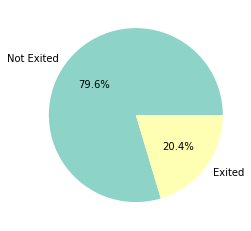

In [107]:
value_counts=data['Exited'].value_counts()
plt.pie(value_counts, labels=['Not Exited', 'Exited'], autopct='%1.1f%%', colors=sns.color_palette('Set3'))


value_counts

In [108]:
X=data.drop('Exited',axis=1)
y=data['Exited']

In [109]:
import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print("Class distribution before oversampling:", Counter(y))

ros = RandomOverSampler(random_state=42)

X, y = ros.fit_resample(X, y)

print("Class distribution after oversampling:", Counter(y))

Class distribution before oversampling: Counter({0: 7963, 1: 2037})
Class distribution after oversampling: Counter({1: 7963, 0: 7963})


In [110]:
X=np.array(X)
X=(X-X.mean())/X.std()

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [113]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
logistic_regression_pred = logistic_regression_model.predict(x_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_regression_pred))
print("Classification Report:\n", classification_report(y_test, logistic_regression_pred))

Logistic Regression:
Accuracy: 0.5734463276836158
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.46      0.52      1633
           1       0.55      0.70      0.61      1553

    accuracy                           0.57      3186
   macro avg       0.58      0.58      0.57      3186
weighted avg       0.58      0.57      0.57      3186



In [114]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)
random_forest_pred = random_forest_model.predict(x_test)

print("Random Forests:")
print("Accuracy:", accuracy_score(y_test, random_forest_pred))
print("Classification Report:\n", classification_report(y_test, random_forest_pred))

Random Forests:
Accuracy: 0.9475831763967357
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1633
           1       0.92      0.98      0.95      1553

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



In [115]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

print("XGBoost (Gradient Boosting):")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

XGBoost (Gradient Boosting):
Accuracy: 0.8976773383553045
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      1633
           1       0.87      0.93      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



In [116]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_pred = dt.predict(x_test)


print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Classifier:
Accuracy: 0.9183929692404269
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      1633
           1       0.87      0.98      0.92      1553

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.93      0.92      0.92      3186

